**Customer Segmentation Analysis using KMeans Clustering**


> **Step 1. Import all libraries and open data source**

In [1]:
#Import all library we will used

import pandas as pd                    # For working with data sets and perform data analysis
import numpy as np                     # To perform mathematical operasion and statistics
import matplotlib.pyplot as plt        # To create data visualization
import seaborn as sns                  # To create data visualization
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import cluster
from sklearn.cluster import KMeans                                         
from sklearn.metrics import silhouette_samples, silhouette_score              

In [2]:
#Open the data source
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


> **Step 2. Cleaning and Outlier Checking**

In [3]:
#Check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


No-null and data type is correct, so we don't need to clean it up.

In [4]:
#Describe numerical data to check the distribution
numeric = ['CustomerID', 'Age', 'Annual Income (k$)','Spending Score (1-100)']
df[numeric].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


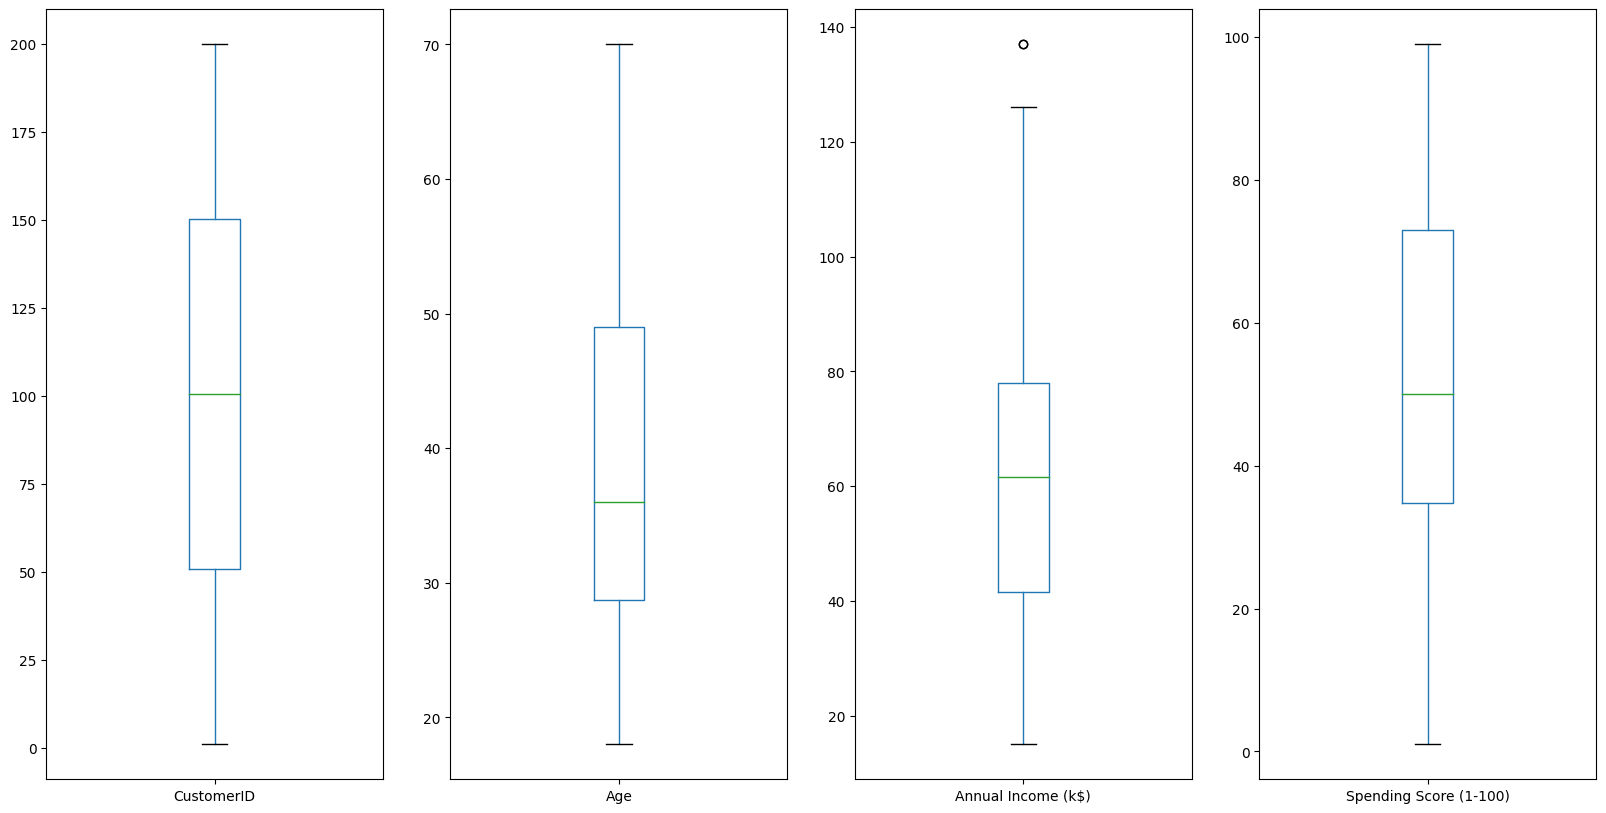

In [5]:
#Check the outlier in numerical data
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20,10))
for i,el in enumerate(numeric): 
    a = df.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

Since we only find outlier in annual income and the gap only about 15%, then we can ignore it.

> **Step 3. Clustering**

> > Data Preparation

In [6]:
#Create encoding for categorical data
df['Gender'] = df['Gender'].astype('category')
df['Gender_encoding'] = df['Gender'].cat.codes
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_encoding
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


> > KMeans method

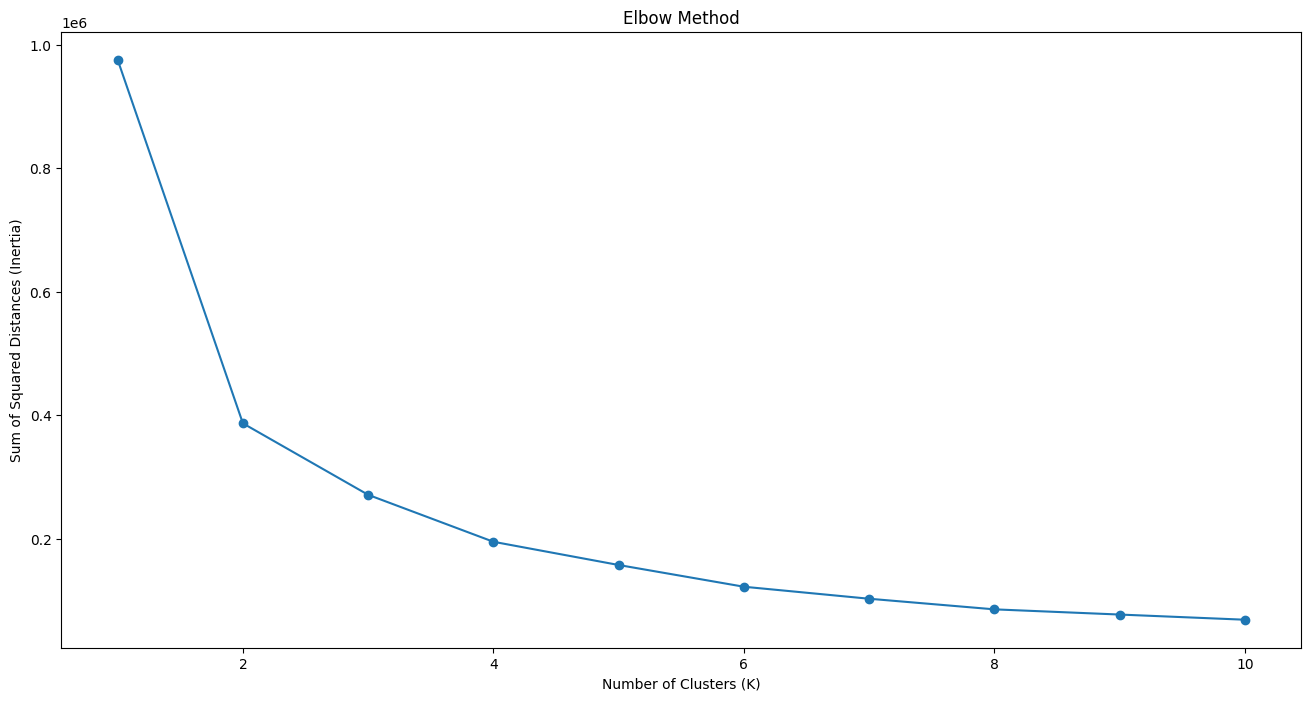

In [7]:
#Drop categorical data
new_df = df.copy()
new_df.drop(['Gender'],axis=1,inplace=True)

# Fit KMeans clustering with different values of K
inertias = []
k_range =  [1, 2, 3, 4, 5, 6, 7, 8, 9,10]

for k in k_range:
  if k > 0:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(new_df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

Based on Elbow method we can see that 6,7, and 8 cluster that start the sloping in graph. Further we checked using **Silhoutte Method**.

> > Silhoutte Method

Final result on Silhouette method, we decide to choose **6 cluster** since coeff near to 1 (compared to others) and data distribution in cluster quite good.

> **Step 4. Segmentation**

Implement cluster number of each data to new data set

In [8]:
#implement clustering Kmeans dengan N Cluster = 6
cluster_model = cluster.KMeans(n_clusters=6, random_state = 42)
cluster_model.fit(new_df)
cluster_label = cluster_model.labels_

new_df['cluster'] = cluster_label
new_df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_encoding,cluster
0,1,19,15,39,1,5
1,2,21,15,81,1,1
2,3,20,16,6,0,5
3,4,23,16,77,0,1
4,5,31,17,40,0,5
...,...,...,...,...,...,...
195,196,35,120,79,0,4
196,197,45,126,28,0,0
197,198,32,126,74,1,4
198,199,32,137,18,1,0


In [9]:
#Merged df with cluster data from new_df
sg_df = df.merge(new_df, how='left', on='CustomerID')
sg_df.drop(['label3','Age_y','Annual Income (k$)_y','Spending Score (1-100)_y','Gender_encoding_y'],axis=1,inplace=True)
sg_df

KeyError: "['label3'] not found in axis"

In [ ]:
#Create Grouping for Spending Score
#Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

#1-19: 1-star
#20-39: 2-star
#40-59: 3-star
#60-79: 4-star
#80-100: 5-star

# Define the bin edges for the groups
bin_edges = [0, 20, 40, 60, 80, 100]

# Create a new column 'Group' that represents the group for each score
sg_df['Spending Score Stars'] = pd.cut(sg_df['Spending Score (1-100)_x'], bins=bin_edges, labels=['1-star', '2-star', '3-star', '4-star', '5-star'])
sg_df

In [ ]:
#Count of user in each cluster
sg_df.groupby('cluster')['CustomerID'].agg(['count'])

In [ ]:
#Count of user gender in each cluster
gender = sg_df.groupby(['cluster','Gender'])['CustomerID'].count()
pd.DataFrame(data=gender).sort_values(by=['cluster','CustomerID'],ascending=True)

In [ ]:
#Find mean, max, and min value in age of every cluster
sg_df.groupby(['cluster'])['Age_x'].agg(['mean','max','min'])

In [ ]:
#Find sum, average, min, and max Annual Income (k$) on each cluster
sg_df.groupby(['cluster'])['Annual Income (k$)_x'].agg(['sum','mean','max','min'])

In [ ]:
#Count each spending score star in each cluster
star = sg_df.groupby(['cluster','Spending Score Stars'])['CustomerID'].count()
pd.DataFrame(data=star).sort_values(by=['cluster','CustomerID'])

**Cluster 0**
*     Customer count: 34
*     Gender: 19 Male, 15 Female
*     Average age: 42
*     Average annual income:$88.7
*     Spending score star:1-star 24, 2-star 10




**Cluster 1**
*     Customer count: 23
*     Gender: 9 Male, 14 Female
*     Average age: 26
*     Average annual income:$26.3
*     Spending score star: 5-star 9, 4-star 14



**Cluster 2**
*     Customer count: 43
*     Gender: 18 Male, 25 Female
*     Average age:46
*     Average annual income:$48.6
*     Spending score star:3-star



**Cluster 3**
*     Customer count: 46
*     Gender: 20 Male, 26 Female
*     Average age: 38
*     Average annual income:$65
*     Spending score star:2-star 6, 3-star 32, 4-star 6, 5-star 2



**Cluster 4**
*     Customer count: 31
*     Gender: 13 Male, 18 Female
*     Average age: 32
*     Average annual income:$90.5
*     Spending score star: 4-star 12, 5-star 19


**Cluster 5**
*     Customer count: 23
*     Gender: 9 Male, 14 Female
*     Average age: 45
*     Average annual income:$26.3
*     Spending score star: 1-star 12, 2-star 11